# Zadanie1 (1 pkt)

Rozważ dane Enterococcus_Dataset.csv. Zawiera on dane dotyczące Enterococcus faecium, a dokładniej posiadanych przez nią (bądź nie) genów oporności na antybiotki. Celem będzie zbadanie jakiego typu reguły asocjacyjne występują w tym zbiorze. Wykorzystaj confidence z progiem 0.9. Wypisz przykładowe relacje (2-3), poszukaj w źródłach zewnętrznych informacji o tych genach. Skomentuj otrzymane wyniki.

In [35]:
import pandas as pd
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

coccus = pd.read_csv('Enterococcus_Dataset.csv')
coccus = coccus.drop(columns=['file'])

frequent_itemsets = apriori(coccus, min_support=0.5, use_colnames=True) #częste slowa
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9) #reguly asocjacyjne
rules_sorted = rules.sort_values(by="confidence",ascending=False)

print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(2))

           antecedents consequents   support  confidence      lift
2         (pbp5_M485A)      (msrC)  0.509960         1.0  1.394444
12  (copB, pbp5_M485A)      (msrC)  0.505976         1.0  1.394444


c:\Users\kajaw\miniconda3\envs\ML\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


(pbp5_M485A), (msrC) 
Wszędzie gdzie występuje mutacja pbp5_M485A, obecny jest również gen msrC.
pbp5_M485A jest wariantem białka PBP5, związanym z obniżoną wrażliwością na β-laktamy (np. ampicylinę), charakterystyczną dla Enterococcus faecium.
msrC koduje pompę effluxową odpowiadającą za oporność na makrolidy. Ich współwystępowanie sugeruje selekcję szczepów wielolekoopornych, typowych dla środowisk szpitalnych.


(copB, pbp5_M485A)      (msrC) 
Jednoczesna obecność copB (homeostaza miedzi / tolerancja metali ciężkich) i pbp5_M485A zawsze wiąże się z obecnością msrC. Reguła wskazuje na możliwą ko-lokalizację genów oporności na antybiotyki i stres środowiskowy.

# Zadanie2 (1 pkt): 

Rozważ dane dotyczące nowotworu piersi.
    
- Podziel dane na zbiór treningowy i testowy.
    
- Zbuduj model klasyfikacji w oparciu o drzewa losowe. Potestuj różne hiperparametry (ręcznie lub za pomocą GridSearch). Narysuj otrzymane drzewo, zinterpretuj model.

- Z użyciem lasu losowego wskaż które cechy okazały sie najbardziej przydatne przy zadaniu klasyfikacji.

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

bc = datasets.load_breast_cancer()

X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

#n_estimators - liczba drzew; inne np max_depth - maksymalna glębokosc drzewa, warto poczytac help(RandomForestClassifier)
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10,
                                 random_state=1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=bc.target_names))


#całkiem dobre wyniki ale zróbmy jeszcze GridSearchCV

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import pandas as pd


forest2 = RandomForestClassifier(random_state=42)

#hiperparametry
param_grid = {
    "criterion": ["gini", "entropy"], #metoda podziału węzła
    "n_estimators": [100, 200, 500], #liczba drzew decyzyjnych
    "max_depth": [None, 5, 10], #maksymalna głębokość drzewa; ograniczanie głębokości zapobiega przeuczeniu
    "min_samples_split": [2, 5], #minimalna liczba próbek wymagana do podziału węzła; większa wartość -> bardziej zachowawcze dzielenie danych -> mniejsza złożoność drzewa i ryzyko przeuczenia
    "min_samples_leaf": [1, 2], #minimalna liczba próbek wymagana do utworzenia liścia;wystarczająco duża liczba obserwacji w liściu -> stabilizuje predykcje, ogranicza dopasowanie do szumu
    "bootstrap": [True, False] #czy używać bootstrapowych próbek do budowy drzew; bootstrap pomaga w redukcji wariancji modelu
}

#gridsearch
grid = GridSearchCV(
    forest2,
    param_grid,
    cv=5,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

#najlepszy model
best_rf = grid.best_estimator_

print("Najlepsze hiperparametry:")
print(grid.best_params_)

y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=bc.target_names))

#ciut lepsze wyniki niz poprzednio

Najlepsze hiperparametry:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



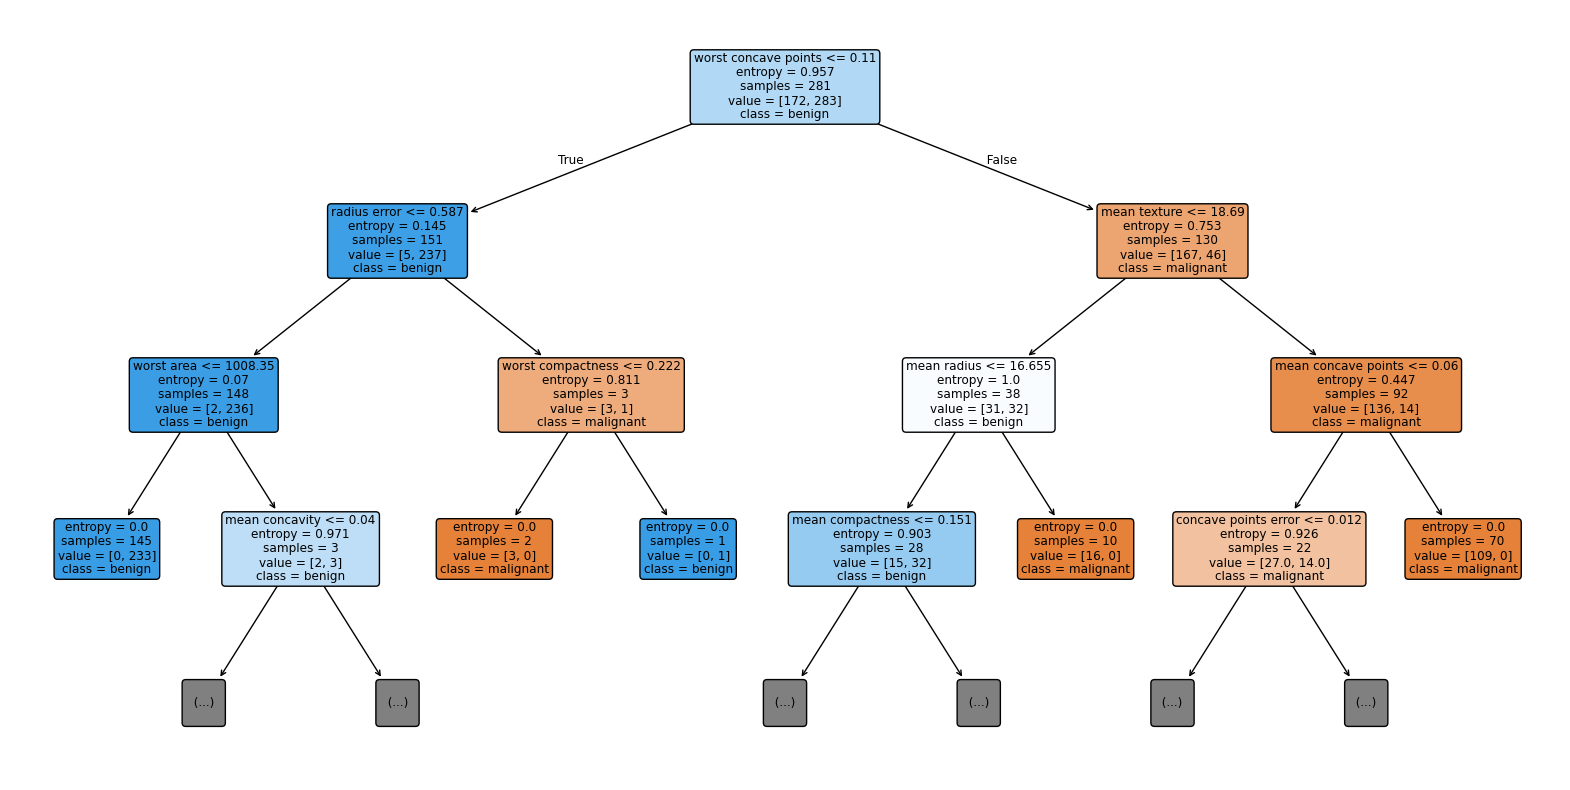

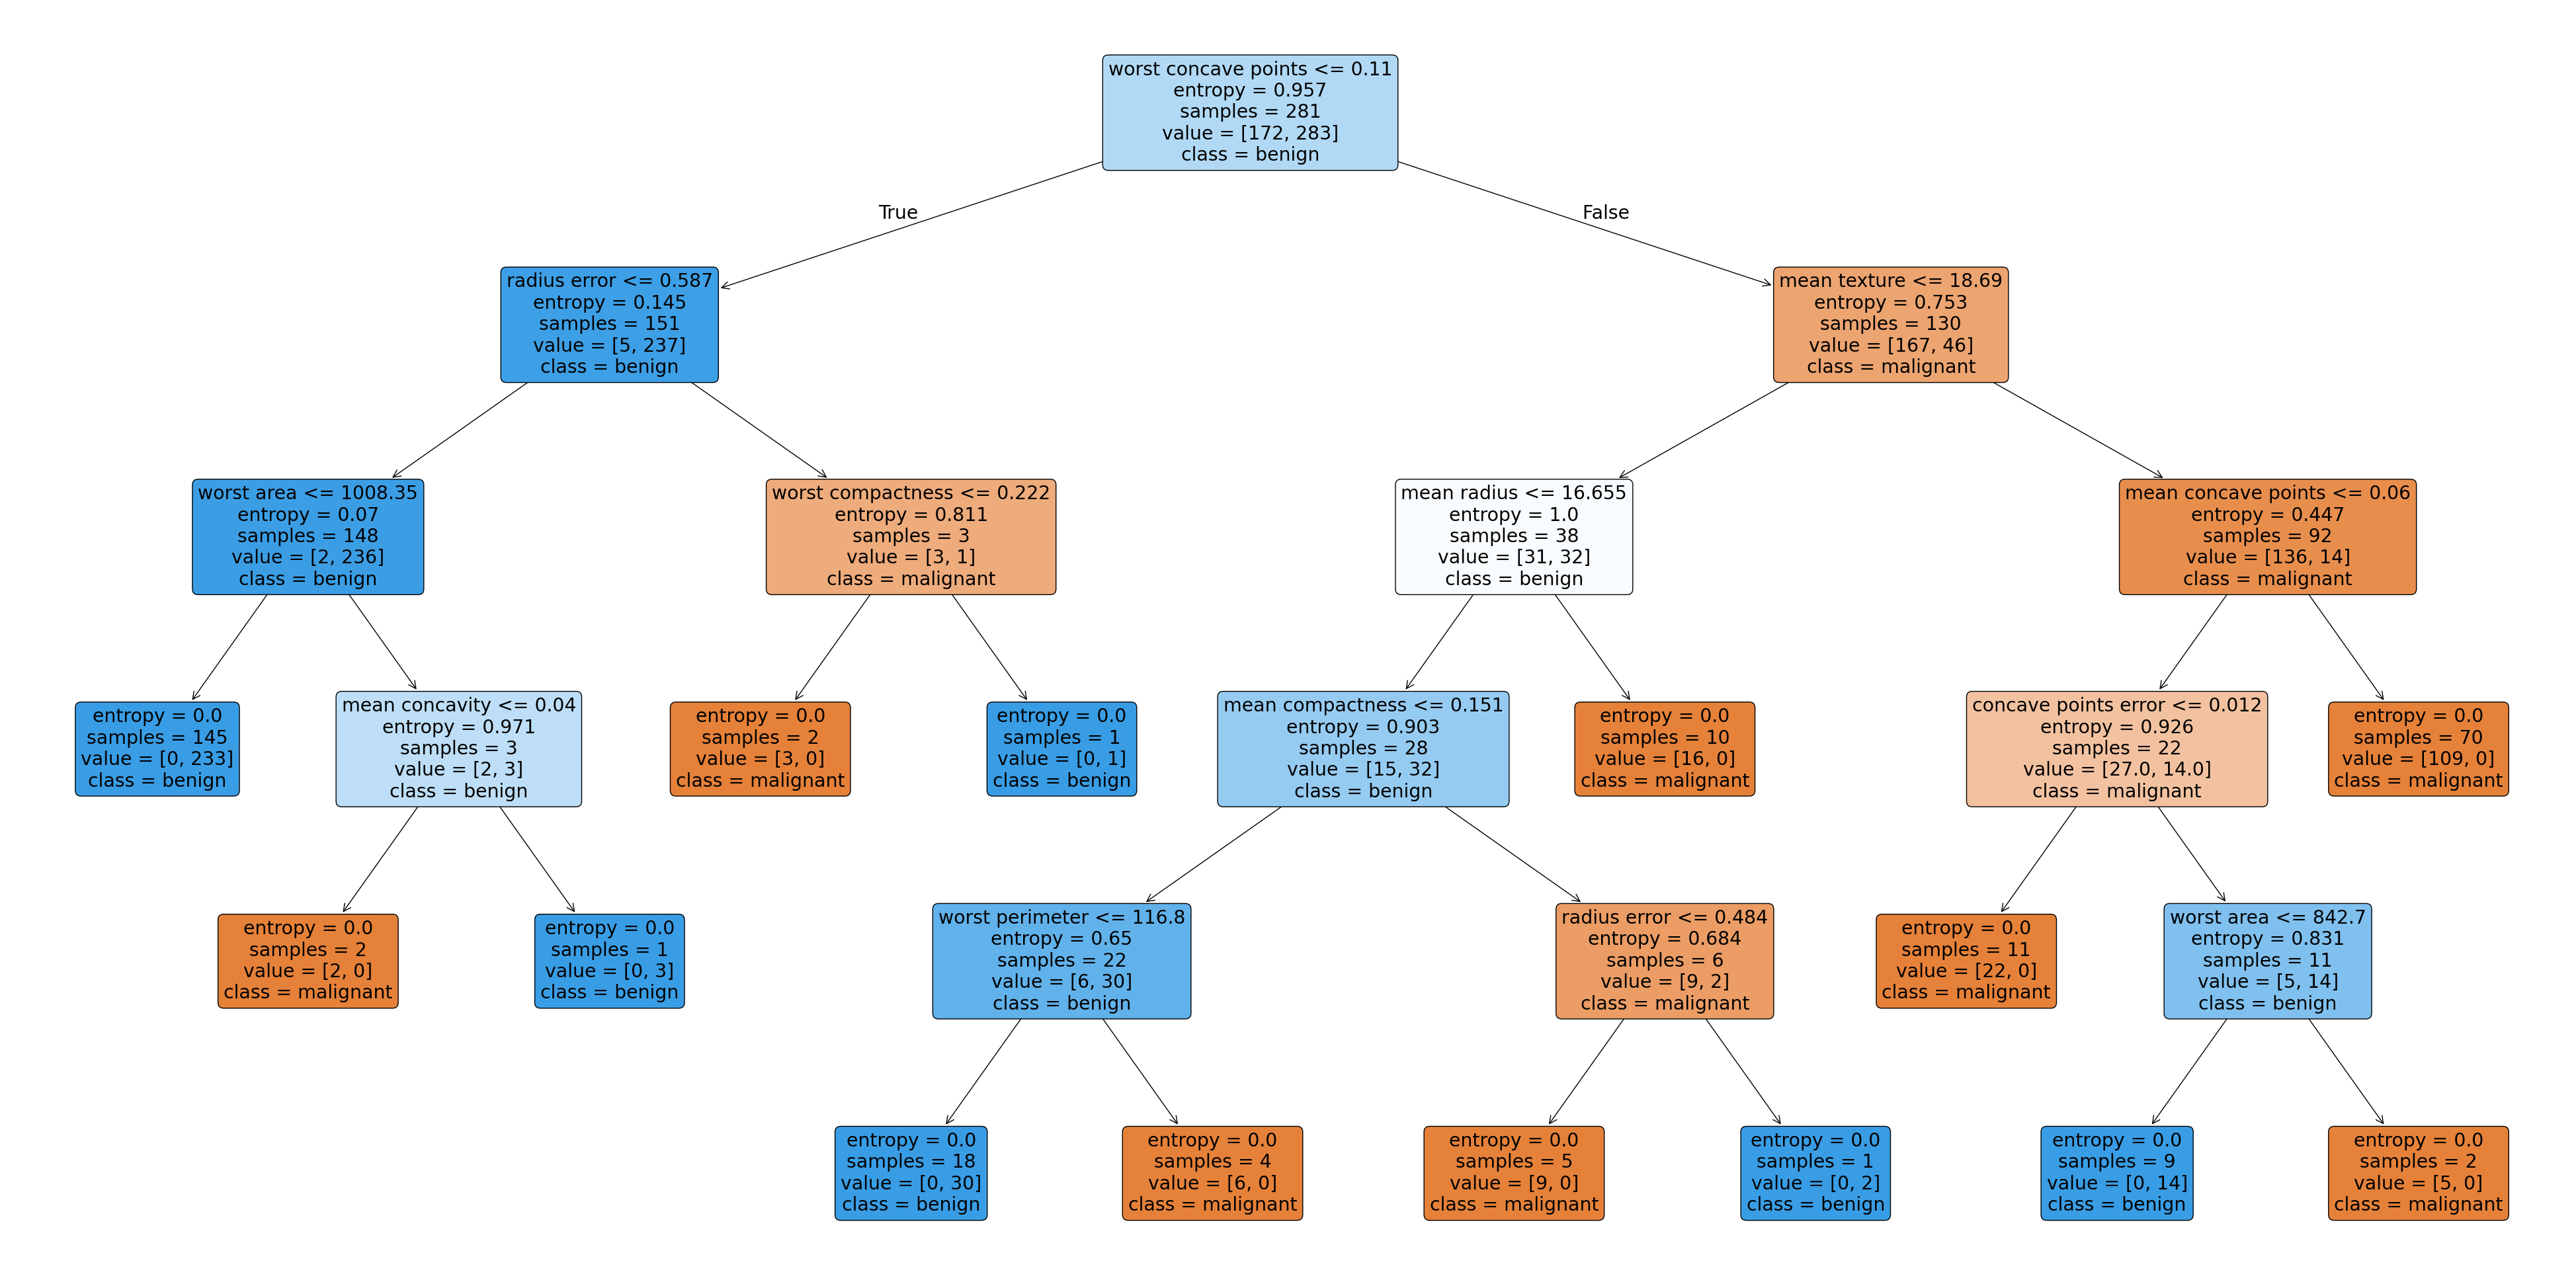

In [4]:
plt.figure(figsize=(20, 10))

plot_tree(
    best_rf.estimators_[0],
    feature_names=bc.feature_names,
    class_names=bc.target_names,
    filled=True,
    rounded=True,
    max_depth=3
    )

plt.show()

plt.figure(figsize=(50, 25))

plot_tree(
    best_rf.estimators_[0],
    feature_names=bc.feature_names,
    class_names=bc.target_names,
    filled=True,
    rounded=True
    )

plt.show()

Główny podział zależy od worst concave points, co też jest najważniejszą cecha decydująca o klasyfikacji.Jeżeli true to dużo wiecej mamy benign.

Niebieskie -benign, pomarczowe - malignant, biały - brak dominujacej cechy.

Kolejnymi najwazniejszymi cechami jest radius error (niereguralnosc guza) i mean texture

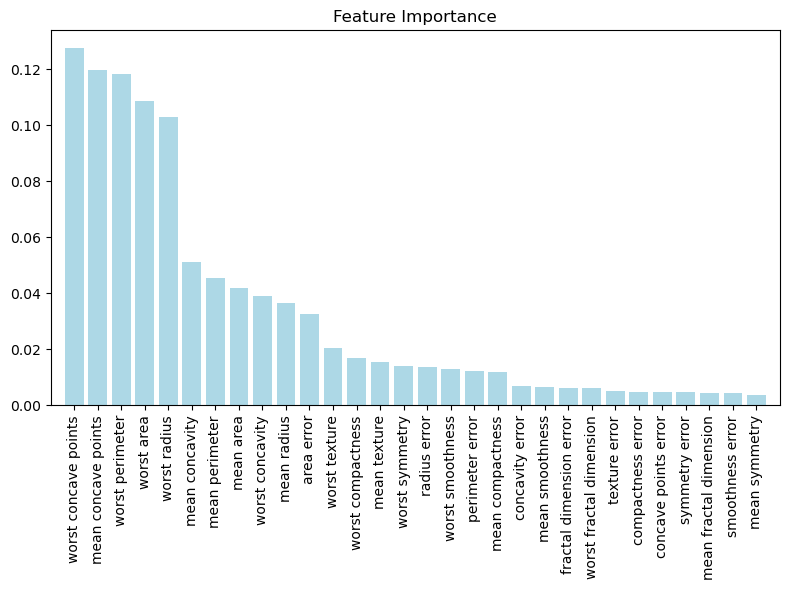

In [40]:
forest = RandomForestClassifier(n_estimators=10000, random_state=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(X_train.shape[1]), bc.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# Zadanie3 (2 pkt): 

Pobierz dowolne historyczne dane pogodowe (np. tempreatura średnia) w wybranym regione (np. Kraków-Balice). Celem jest budowa modelu, który będzie przewidywał wybraną cechę na kilka kolejnych dni. Zrealizuj to na kilka sposobów.

- zbuduj model regresji $X_t \sim f_1(X_{t-1})+f_2(X_{t-2})+...+f_k(X_{t-k})$ dla pewnego $k$ oraz funkcji $f_1,f_2,...,f_k$ (możesz też założyć, że te funkcje nie występują, są identycznościami).
- zbuduj model w oparciu o drzewa losowe (las losowy)
- inne podejścia (np. dane historyczne z analogicznych okresów, biorąc pod uwagę inne miejsca podobne geograficznie (z minionych okresów), uwzględniając inne właściwości pogodowe, np. opady)


Uwagi i komentarze:
- wybierz odpowiednią liczbę danych historycznych (tygodnie/miesiące/lata?); niekoniecznie im więcej danych tym lepiej? np. sezony
- dzieląc dane na zbiór treningowy i testowy zachowaj ciągłość czasową - w danych treningowych mamy okresy wcześniejsze, w danych testowych dane późniejsze
- przy ocenie predykcji możesz użyć miary $MSE$ lub innej
- zwizualizuj zarówno dane historyczne jak i predykcje
- skomentuj otrzymane wyniki

## Data

Przetestowałam jakies 4 datasety i wynki były TRAGICZNE (accuracy dla lr na minusie), zostawiam tylko ostatni 

data from hugging face https://huggingface.co/datasets/elskow/Weather4cast

In [ ]:
import pandas as pd
train = pd.read_csv('train.csv') 
train.describe()

,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation
count,13208.000000,13208.000000,13208.000000,13208.000000,13198.000000,13198.000000,13198.000000,13208.000000,13208.000000,12792.000000,13198.000000,13258.000000
mean,23.145215,17.402991,26.699992,19.709888,17.043767,6.330224,0.086511,11.566308,28.175780,166.380863,3.309235,420.378866
std,12.856324,12.248475,16.617231,15.796247,6.460664,9.457546,0.541745,6.125631,9.003485,93.806254,1.413232,863.983906
min,-30.000000,-33.400000,-34.800000,-38.200000,0.000000,0.000000,0.000000,2.600000,6.800000,0.000000,0.000000,0.000000
25%,18.600000,11.600000,20.300000,11.400000,13.610000,0.000000,0.000000,7.200000,22.300000,96.000000,2.450000,0.000000
50%,28.900000,24.200000,34.600000,28.600000,18.430000,2.200000,0.000000,10.200000,26.600000,157.000000,3.580000,5.000000
75%,31.300000,25.400000,37.800000,30.600000,21.520000,9.300000,0.000000,14.400000,32.400000,241.000000,4.340000,58.000000
max,38.900000,28.500000,46.200000,34.500000,32.420000,182.700000,24.360000,62.300000,129.200000,360.000000,7.620000,2678.000000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [4]:
def prepare_data(df, drop_columns, train=False):
    df = df[df['city'] == 'su'].copy()
    df['time'] = pd.to_datetime(df['time'])#convert time column to datetime
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month
    df['year'] = df['time'].dt.year
    if train == True:
        df = df[df['year'] < 2022]
    df = df[df['month'] == 1] 
    print(df['year'].unique())    #chech if no intersections
    df = df.drop(columns=drop_columns)
    X = df.drop(columns=['temperature_2m_max (°C)'])
    y = df['temperature_2m_max (°C)']  
    
    return X, y

In [5]:
#train - january data 2018-2021
train = pd.read_csv('train.csv')
drop_columns_train = ['temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'city', 'month', 'elevation', 'time', 'sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)', 'rain_sum (mm)']
X_train, y_train = prepare_data(train, drop_columns=drop_columns_train, train=True)

#test - january data 2022
test = pd.read_csv('test.csv')
drop_columns_test =['id', 'temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'city', 'month', 'elevation', 'time','sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)']
X_test, y_test = prepare_data(test, drop_columns=drop_columns_test)


[2018 2019 2020 2021]
[2022]


In [6]:
X_train.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True])

In [7]:
print(X_train.head())
print(y_train.head())

   shortwave_radiation_sum (MJ/m²)  snowfall_sum (cm)  \
0                            17.59                0.0   
1                            19.87                0.0   
2                            20.44                0.0   
3                            20.44                0.0   
4                            20.10                0.0   

   windspeed_10m_max (km/h)  windgusts_10m_max (km/h)  \
0                       6.9                      20.2   
1                       7.1                      18.0   
2                       8.1                      21.2   
3                       7.2                      21.6   
4                       6.9                      21.2   

   et0_fao_evapotranspiration (mm)  day  year  
0                             3.61    1  2018  
1                             4.11    2  2018  
2                             4.23    3  2018  
3                             4.22    4  2018  
4                             4.16    5  2018  
0    29.9
1    30.6
2    3

## Linear regression

Linear Regression:

RMSE:          0.58
R^2:           0.59
Max Error:     1.20


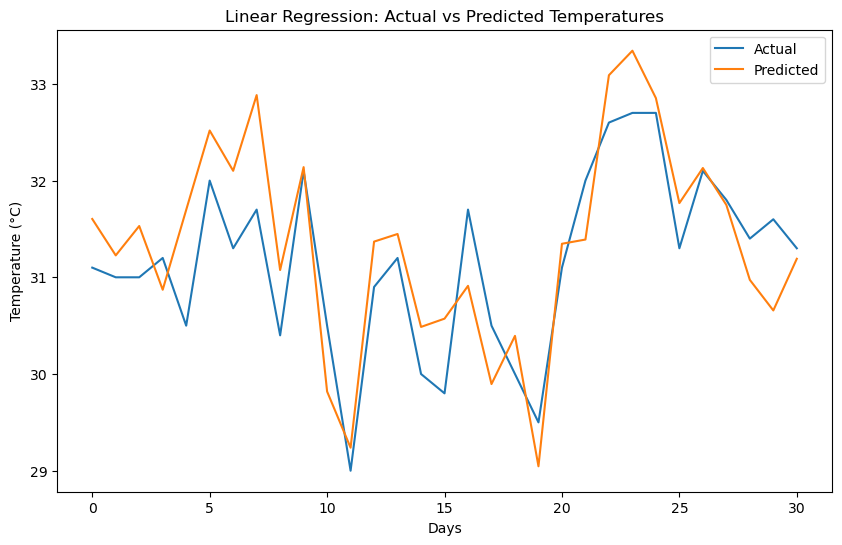

In [11]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
mse = np.mean((y_test - lr_pred) ** 2)
rmse = np.sqrt(mse)
accuracy = lr.score(X_test, y_test) 
max_error = np.max(np.abs(y_test - lr_pred))

print("Linear Regression:\n")
print(f"RMSE:          {rmse:.2f}")
print(f"R^2:           {accuracy:.2f}")
print(f"Max Error:     {max_error:.2f}")

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(lr_pred)), lr_pred, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Temperatures')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Days')  
plt.show()

bardzo dobre przewidywania:), maksymalna róznica to niewiele podan stopień

In [12]:
X_train.columns

Index(['shortwave_radiation_sum (MJ/m²)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'et0_fao_evapotranspiration (mm)', 'day', 'year'],
      dtype='object')

In [13]:
lr.coef_

array([-5.56471147e-01, -8.88178420e-16, -2.40511828e-02, -2.49505577e-02,
        3.92204587e+00,  3.09885343e-04,  1.00260709e-01])

najważneiejsze cechy to 'et0_fao_evapotranspiration (mm)' - to wskaźnik obliczany teoretycznie, reprezentuje on maksymalną ilość wody, jaką mogłaby wyparować i wytranspirować roślina referencyjna przy danych warunkach atmosferycznych.

### Model bez tej cechy

[2018 2019 2020 2021]
[2022]
Linear Regression:

RMSE:          0.77
R^2:           0.28
Max Error:     1.86


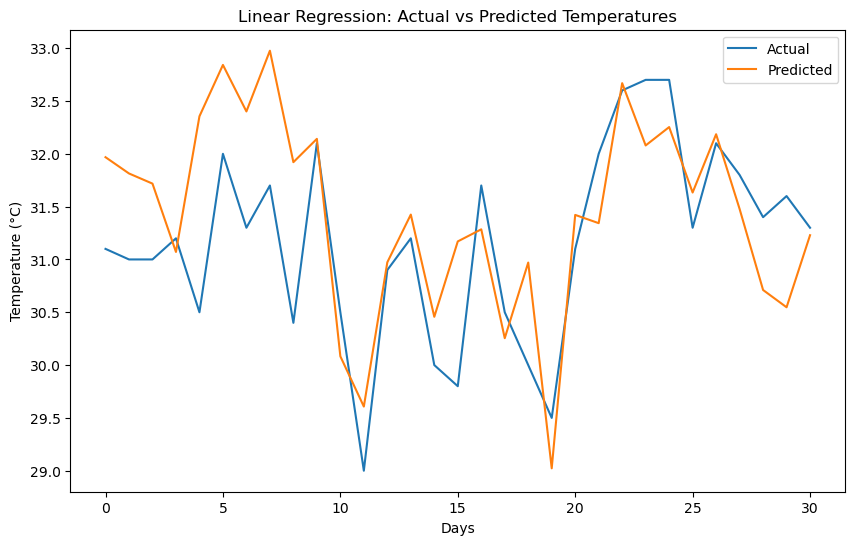

In [18]:
def prepare_data(df, drop_columns, train=False):
    df = df[df['city'] == 'su'].copy()
    df['time'] = pd.to_datetime(df['time'])#convert time column to datetime
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month    
    df['year'] = df['time'].dt.year
    if train == True:
        df = df[df['year'] < 2022]
    df = df[df['month'] == 1] 
    print(df['year'].unique())    #chech if no intersections
    df = df.drop(columns=drop_columns)
    X = df.drop(columns=['temperature_2m_max (°C)'])
    y = df['temperature_2m_max (°C)']  
    
    return X, y
#train - january data 2018-2021
train = pd.read_csv('train.csv')
drop_columns_train = ['et0_fao_evapotranspiration (mm)', 'temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)','month', 'city', 'elevation', 'time', 'sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)', 'rain_sum (mm)']
X_train, y_train = prepare_data(train, drop_columns=drop_columns_train, train=True)

#test - january data 2022
test = pd.read_csv('test.csv')
drop_columns_test =['et0_fao_evapotranspiration (mm)', 'id', 'temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)','month', 'city', 'elevation', 'time','sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)']
X_test, y_test = prepare_data(test, drop_columns=drop_columns_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
mse = np.mean((y_test - lr_pred) ** 2)
rmse = np.sqrt(mse)
accuracy = lr.score(X_test, y_test) 
max_error = np.max(np.abs(y_test - lr_pred))

print("Linear Regression:\n")
print(f"RMSE:          {rmse:.2f}")
print(f"R^2:           {accuracy:.2f}")
print(f"Max Error:     {max_error:.2f}")

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(lr_pred)), lr_pred, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Temperatures')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Days')  
plt.show()

gorzej ale nadal fajne wyniki

In [19]:
X_train.columns

Index(['shortwave_radiation_sum (MJ/m²)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)', 'day', 'year'],
      dtype='object')

In [20]:
lr.coef_

array([ 2.16466811e-01, -3.98986399e-16,  3.42128237e-02, -3.60599142e-02,
       -6.05944448e-03,  1.18931777e-01])

## Drzewa losowe

Najlepsze hiperparametry:
{'bootstrap': True, 'criterion': 'absolute_error', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Regressor:

RMSE:          0.79
R^2:           0.24
Max Error:     1.58


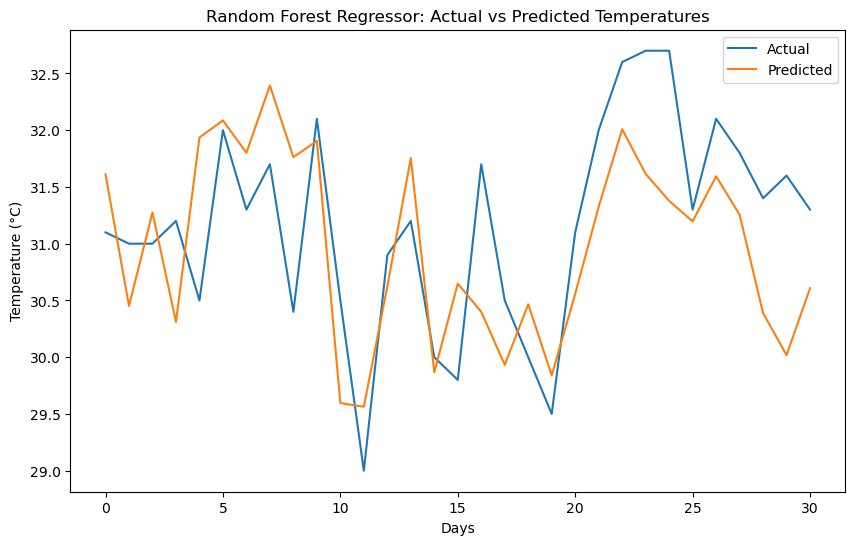

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV


rfr = RandomForestRegressor(n_estimators=100, n_jobs=-1,random_state=42, max_depth=10)


#hiperparametry
param_grid = {
    "criterion": ["squared_error", "absolute_error"],
    "n_estimators": [100, 200, 500], #liczba drzew decyzyjnych
    "max_depth": [None, 5, 10], #maksymalna głębokość drzewa; ograniczanie głębokości zapobiega przeuczeniu
    "min_samples_split": [2, 5], #minimalna liczba próbek wymagana do podziału węzła; większa wartość -> bardziej zachowawcze dzielenie danych -> mniejsza złożoność drzewa i ryzyko przeuczenia
    "min_samples_leaf": [1, 2], #minimalna liczba próbek wymagana do utworzenia liścia;wystarczająco duża liczba obserwacji w liściu -> stabilizuje predykcje, ogranicza dopasowanie do szumu
    "bootstrap": [True, False] #czy używać bootstrapowych próbek do budowy drzew; bootstrap pomaga w redukcji wariancji modelu
}

#gridsearch
grid = GridSearchCV(
    rfr,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error"
)

grid.fit(X_train, y_train)

#najlepszy model
best_rf = grid.best_estimator_

print("Najlepsze hiperparametry:")
print(grid.best_params_)

rfr_pred = best_rf.predict(X_test)

# Obliczanie metryk regresji
R2 = r2_score(y_test, rfr_pred)
rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
max_error = np.max(np.abs(y_test - rfr_pred))

print("Random Forest Regressor:\n")
print(f"RMSE:          {rmse:.2f}")
print(f"R^2:           {R2:.2f}")
print(f"Max Error:     {max_error:.2f}")

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(rfr_pred)), rfr_pred, label='Predicted')
plt.title('Random Forest Regressor: Actual vs Predicted Temperatures')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Days')  
plt.show()

## LR dla 3 miesiecy

[2018 2019 2020 2021]
[2022]
Linear Regression:

RMSE:          0.70
R^2:           0.57
Max Error:     1.86


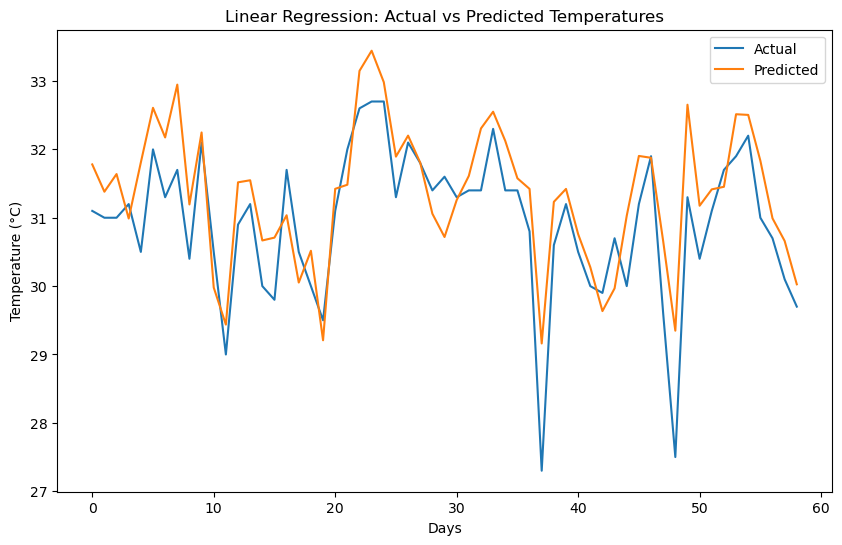

In [25]:
def prepare_data(df, drop_columns, train=False):
    df = df[df['city'] == 'su'].copy()
    df['time'] = pd.to_datetime(df['time'])#convert time column to datetime
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month    
    df['year'] = df['time'].dt.year
    if train == True:
        df = df[df['year'] < 2022]
    df = df[df['month'] < 3] 
    print(df['year'].unique())    #chech if no intersections
    df = df.drop(columns=drop_columns)
    X = df.drop(columns=['temperature_2m_max (°C)'])
    y = df['temperature_2m_max (°C)']  
    
    return X, y
#train - january data 2018-2021
train = pd.read_csv('train.csv')
drop_columns_train = ['temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'city', 'elevation', 'time', 'sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)', 'rain_sum (mm)']
X_train, y_train = prepare_data(train, drop_columns=drop_columns_train, train=True)

#test - january data 2022
test = pd.read_csv('test.csv')
drop_columns_test =['id', 'temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'city', 'elevation', 'time','sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)']
X_test, y_test = prepare_data(test, drop_columns=drop_columns_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
mse = np.mean((y_test - lr_pred) ** 2)
rmse = np.sqrt(mse)
accuracy = lr.score(X_test, y_test) 
max_error = np.max(np.abs(y_test - lr_pred))

print("Linear Regression:\n")
print(f"RMSE:          {rmse:.2f}")
print(f"R^2:           {accuracy:.2f}")
print(f"Max Error:     {max_error:.2f}")

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(lr_pred)), lr_pred, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Temperatures')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Days')  
plt.show()

## LR dla pół roku

[2018 2019 2020 2021]
[2022]
Linear Regression:

RMSE:          0.60
R^2:           0.65
Max Error:     2.37


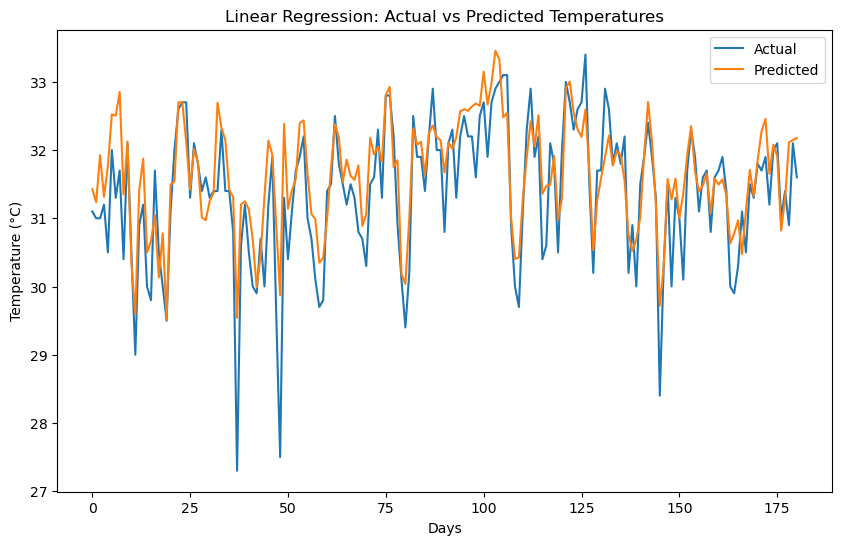

In [26]:
def prepare_data(df, drop_columns, train=False):
    df = df[df['city'] == 'su'].copy()
    df['time'] = pd.to_datetime(df['time'])#convert time column to datetime
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month    
    df['year'] = df['time'].dt.year
    if train == True:
        df = df[df['year'] < 2022]
    df = df[df['month'] <7] 
    print(df['year'].unique())    #chech if no intersections
    df = df.drop(columns=drop_columns)
    X = df.drop(columns=['temperature_2m_max (°C)'])
    y = df['temperature_2m_max (°C)']  
    
    return X, y
#train - january data 2018-2021
train = pd.read_csv('train.csv')
drop_columns_train = ['temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'city', 'elevation', 'time', 'sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)', 'rain_sum (mm)']
X_train, y_train = prepare_data(train, drop_columns=drop_columns_train, train=True)

#test - january data 2022
test = pd.read_csv('test.csv')
drop_columns_test =['id', 'temperature_2m_min (°C)','apparent_temperature_max (°C)', 'apparent_temperature_min (°C)', 'city', 'elevation', 'time','sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)']
X_test, y_test = prepare_data(test, drop_columns=drop_columns_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
mse = np.mean((y_test - lr_pred) ** 2)
rmse = np.sqrt(mse)
accuracy = lr.score(X_test, y_test) 
max_error = np.max(np.abs(y_test - lr_pred))

print("Linear Regression:\n")
print(f"RMSE:          {rmse:.2f}")
print(f"R^2:           {accuracy:.2f}")
print(f"Max Error:     {max_error:.2f}")

plt.figure(figsize=(10,6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(lr_pred)), lr_pred, label='Predicted')
plt.title('Linear Regression: Actual vs Predicted Temperatures')
plt.legend()
plt.ylabel('Temperature (°C)')
plt.xlabel('Days')  
plt.show()